In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lhcb_data = pd.read_csv('Data/popularity-728days.csv')
lhcb_data.irow(range(0,3))

,Name,Configuration,ProcessingPass,FileType,Type,Creation-week,NbLFN,LFNSize,NbDisk,DiskSize,...,95,96,97,98,99,100,101,102,103,104
0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,/LHCb/Collision10,/RealData/Reco08-MINBIAS-FIRST-14-NB/Stripping12d,MINIBIAS.DST,1,104591,67,0.317900,134,0.635799,...,12687,12687,12687,12687,12687,12687,12687,12687,12687,12687
1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,/LHCb/Collision10,/RealData/Reco08/Stripping14,BHADRON.DST,1,104607,227,0.649204,980,2.819260,...,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631
2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,/LHCb/Collision10,/RealData/Reco08/Stripping14,CALIBRATION.DST,1,104607,355,1.370105,355,1.370105,...,0,0,0,474,708,708,708,708,708,708


In [3]:
#test_data = lhcb_data.irow(np.random.choice(lhcb_data.index, 1000))
test_data = lhcb_data
test_data.shape

(10368, 124)

In [4]:
risk_matrix = np.array([[0, 1],
                        [1000, 0]])

In [5]:
from datapop.LHCb import RecommendationSystem
rs = RecommendationSystem(forecast_horizont=26, class_abs_thresholds=1, risk_matrix=risk_matrix)
report = rs.report(data=test_data)

KFold prediction using folds column
KFold prediction using folds column


In [6]:
report.irow(range(0,5))

,ID,Proba_Type_0,Proba_Type_1,Risk_Type_0,Risk_Type_1,Recommended_Type
0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.0001336369,0.9998664,999.8664,0.0001336369,1
1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.9332763,0.06672369,66.72369,0.9332763,1
2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.9905513,0.00944874,9.44874,0.9905513,1
3,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.001040474,0.9989595,998.9595,0.001040474,1
4,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.9856506,0.01434941,14.34941,0.9856506,1


#Simulation

In [14]:
from datapop.LHCb import LHCbSimulator
from datapop.LHCb import RecommendationSystem

risk_matrix = np.array([[0, 1],
                        [1000, 0]])

rs = RecommendationSystem(forecast_horizont=26, class_abs_thresholds=1, risk_matrix=risk_matrix)

sim = LHCbSimulator(data=test_data,\
                   begin=52, step=10,\
                   recommendation_system=rs)

simulation_report = sim.simulation_report()

KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column


In [15]:
simulation_report.irow(range(0,3))

,Periods,ROC_AUC,Mistakes,Recommended_total_disk_size,True_total_disk_size
0,52,0.733492,7,0.993277,0.994279
1,62,0.717345,17,0.987107,0.990354
2,72,0.725197,15,0.971444,0.983084


In [16]:
from datapop.LHCb import LRU
lru = LRU(forecast_horizont=26, class_abs_thresholds=1)

sim_lru = LHCbSimulator(data=test_data,\
                   begin=52, step=10,\
                   recommendation_system=lru)

simulation_lru = sim_lru.simulation_report()

In [17]:
simulation_lru.irow(range(0,3))

,Periods,ROC_AUC,Mistakes,Recommended_total_disk_size,True_total_disk_size
0,52,0.697871,103,0.870266,0.897251
1,62,0.668852,137,0.849591,0.880052
2,72,0.677121,161,0.822394,0.856768


In [18]:
from datapop.LHCb import Origin
origin = Origin(forecast_horizont=26, class_abs_thresholds=1)

sim_origin = LHCbSimulator(data=test_data,\
                   begin=52, step=10,\
                   recommendation_system=origin)

simulation_origin = sim_origin.simulation_report()

In [19]:
simulation_origin.irow(range(0,3))

,Periods,ROC_AUC,Mistakes,Recommended_total_disk_size,True_total_disk_size
0,52,0.5,0,1,1
1,62,0.5,0,1,1
2,72,0.5,0,1,1


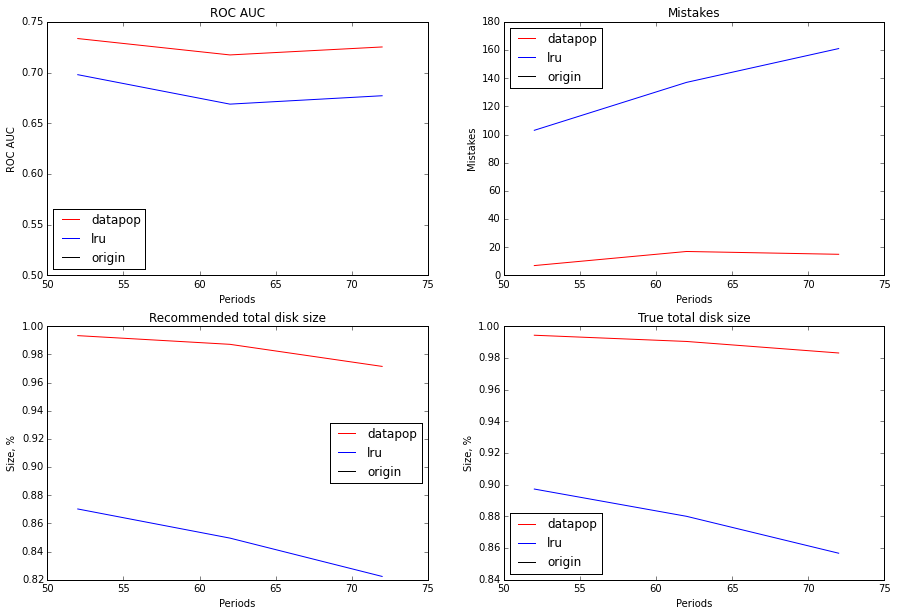

In [20]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
dp = simulation_report
lr = simulation_lru
orig = simulation_origin
plt.plot(dp.Periods, dp.ROC_AUC, label='datapop', c='r')
plt.plot(lr.Periods, lr.ROC_AUC, label='lru', c='b')
plt.plot(orig.Periods, orig.ROC_AUC, label='origin', c='0')
plt.title('ROC AUC')
plt.xlabel('Periods')
plt.ylabel('ROC AUC')
plt.legend(loc='best')

plt.subplot(2,2,2)
plt.plot(dp.Periods, dp.Mistakes, label='datapop', c='r')
plt.plot(lr.Periods, lr.Mistakes, label='lru', c='b')
plt.plot(orig.Periods, orig.Mistakes, label='origin', c='0')
plt.title('Mistakes')
plt.xlabel('Periods')
plt.ylabel('Mistakes')
plt.legend(loc='best')

plt.subplot(2,2,3)
plt.plot(dp.Periods, dp.Recommended_total_disk_size, label='datapop', c='r')
plt.plot(lr.Periods, lr.Recommended_total_disk_size, label='lru', c='b')
plt.plot(orig.Periods, orig.Recommended_total_disk_size, label='origin', c='0')
plt.title('Recommended total disk size')
plt.xlabel('Periods')
plt.ylabel('Size, %')
plt.legend(loc='best')

plt.subplot(2,2,4)
plt.plot(dp.Periods, dp.True_total_disk_size, label='datapop', c='r')
plt.plot(lr.Periods, lr.True_total_disk_size, label='lru', c='b')
plt.plot(orig.Periods, orig.True_total_disk_size, label='origin', c='0')
plt.title('True total disk size')
plt.xlabel('Periods')
plt.ylabel('Size, %')
plt.legend(loc='best')